## Assignment for week 6:
### Knock airport Weather

Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

    The temperature
    The mean temperature each day
    The mean temperature for each month

60% of the marks will be given for the above

For the last 40%

Plot:

    The Windspeed (there is data missing from this column)
    The rolling windspeed (say over 24 hours)
    The max windspeed for each day
    The monthly mean of the daily max windspeeds (yer I am being nasty here)

## Imported libraries & modules:

### [Pandas](https://pandas.pydata.org/) for data frames:
A fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 
### [Matplotlib](https://matplotlib.org/stable/) for plotting:
A comprehensive library for creating static, animated, and interactive visualizations.
### [Seaborn](https://seaborn.pydata.org/)
seaborn: statistical data visualization

### Part 1: Temperature
1.1 Import the data frames:

In [109]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file from the URL.
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Skipping initial rows to directly access data & adding 'low_memory=False' afer it was suggested by output.
data = pd.read_csv(url, skiprows=23, low_memory=False)

1.2. Inspect and analyze the data set to understand its structure:

In [110]:
# Display the first few rows to understand data structure.
print(data.head())
print(data.columns)

                date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3  31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4  31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]
Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'i

In [111]:
# Inspect date format in first 20 rows.
print("Columns:", data.columns)
print(data['date'].head(20))

Columns: Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')
0     10-apr-1996 14:00
1     31-jul-1996 08:00
2     31-jul-1996 09:00
3     31-jul-1996 10:00
4     31-jul-1996 11:00
5     31-jul-1996 12:00
6     31-jul-1996 13:00
7     31-jul-1996 14:00
8     31-jul-1996 15:00
9     31-jul-1996 16:00
10    31-jul-1996 17:00
11    31-jul-1996 18:00
12    31-jul-1996 19:00
13    31-jul-1996 20:00
14    31-jul-1996 21:00
15    31-jul-1996 22:00
16    31-jul-1996 23:00
17    01-aug-1996 00:00
18    01-aug-1996 01:00
19    01-aug-1996 02:00
Name: date, dtype: object


1.3 Convert 'date' column to datetime format:

In [112]:
# Convert 'date' column to datetime format.
data['date'] = pd.to_datetime(data['date'], errors='coerce')

C:\Users\User\AppData\Local\Temp\ipykernel_8720\3380345208.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], errors='coerce')


1.4 Plot the temperature across the years:

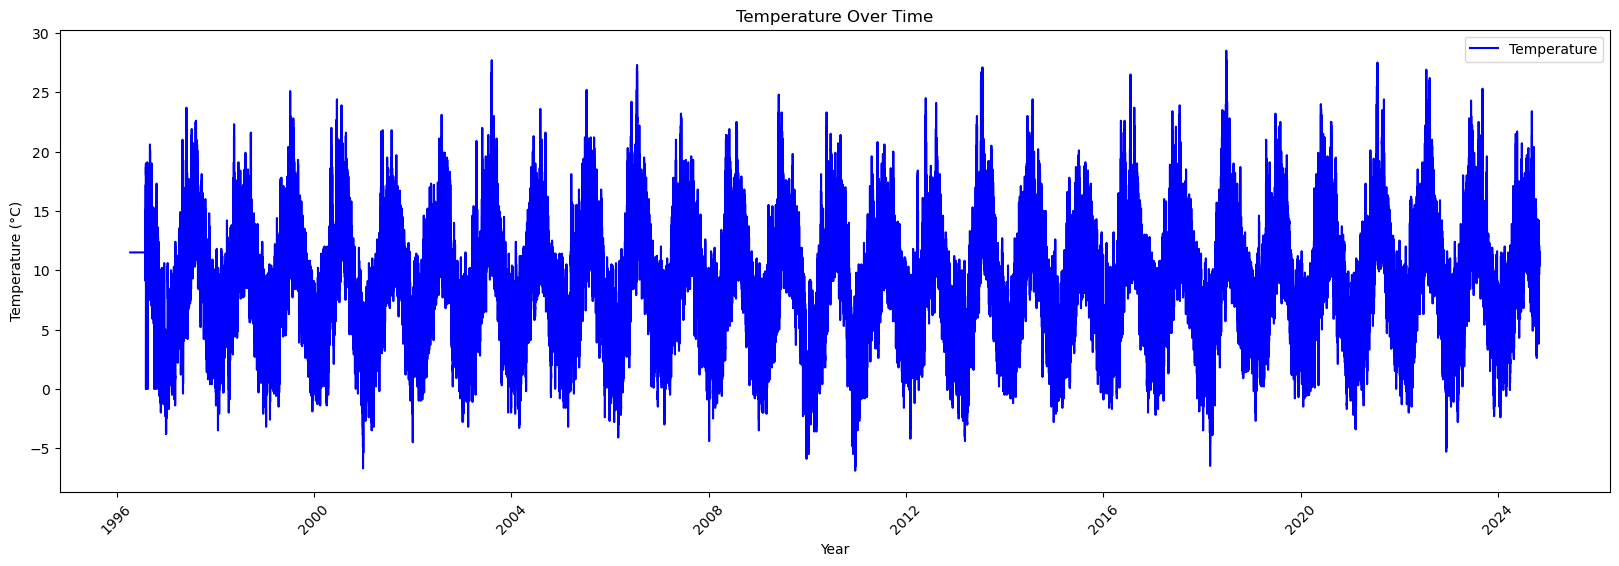

In [113]:
# Plot temperature.
plt.figure(figsize=(20, 6))
plt.plot(data['date'], data['temp'], color='blue', label='Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

1.5 Plot mean temperature for each day per individual year:

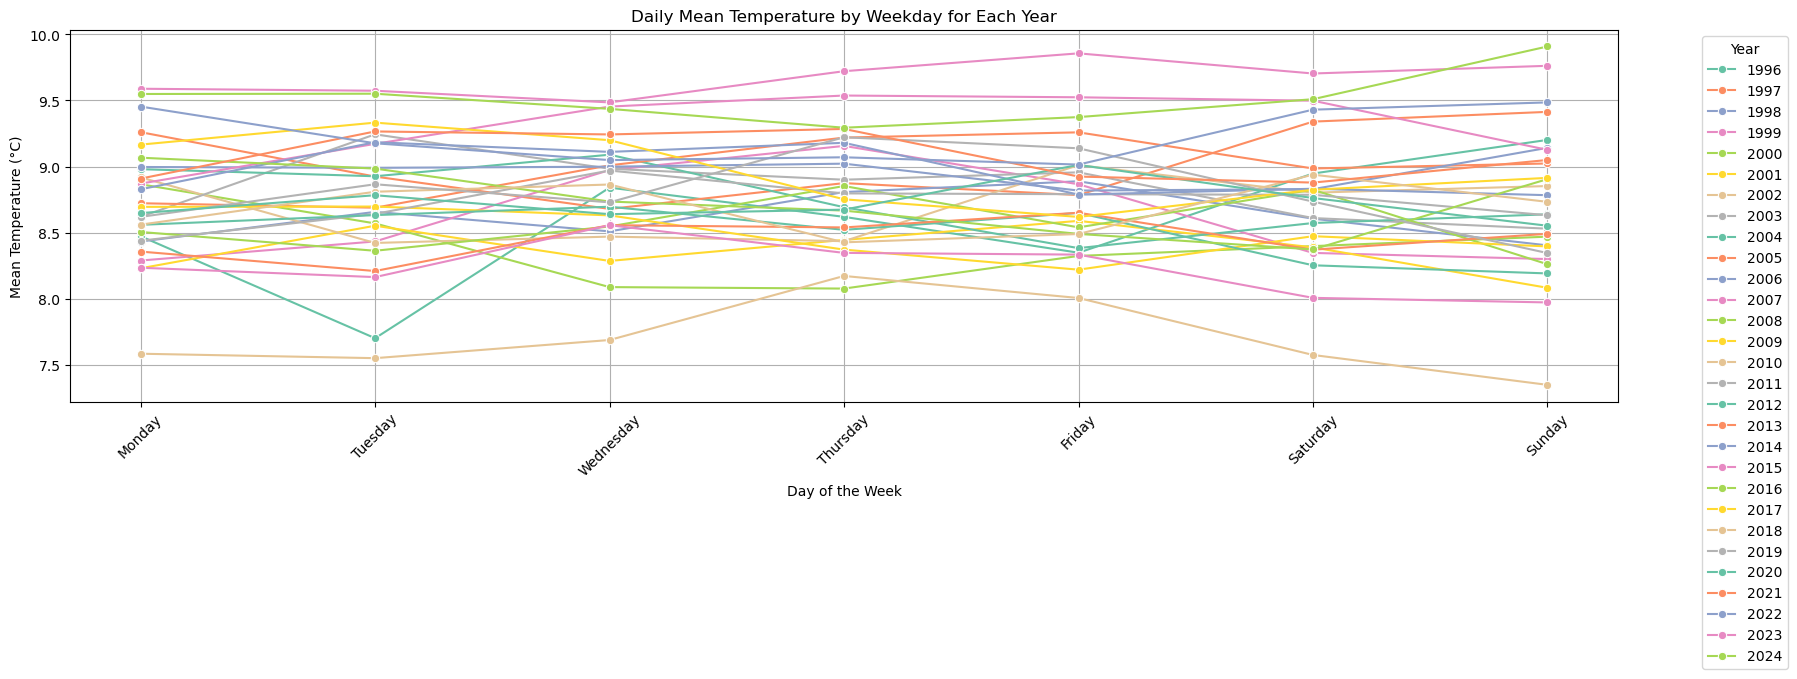

In [114]:
# Daily Mean temperature: Extract year and day of the week.
data['year'] = data['date'].dt.year
data['weekday'] = data['date'].dt.day_name()

# Calculate daily mean temperature.
daily_mean = data.groupby(['year', 'weekday'])['temp'].mean().reset_index()

# Arrange days of week in appropriate order.
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_mean['weekday'] = pd.Categorical(daily_mean['weekday'], categories=days_order, ordered=True)
daily_mean = daily_mean.sort_values('weekday')

# Plot.
plt.figure(figsize=(18, 6))
sns.lineplot(data=daily_mean, x='weekday', y='temp', hue='year', palette='Set2', marker='o')

# Set labels and title.
plt.xlabel('Day of the Week')
plt.ylabel('Mean Temperature (°C)')
plt.title('Daily Mean Temperature by Weekday for Each Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


1.6 Plot mean temperature for each month per individual year:

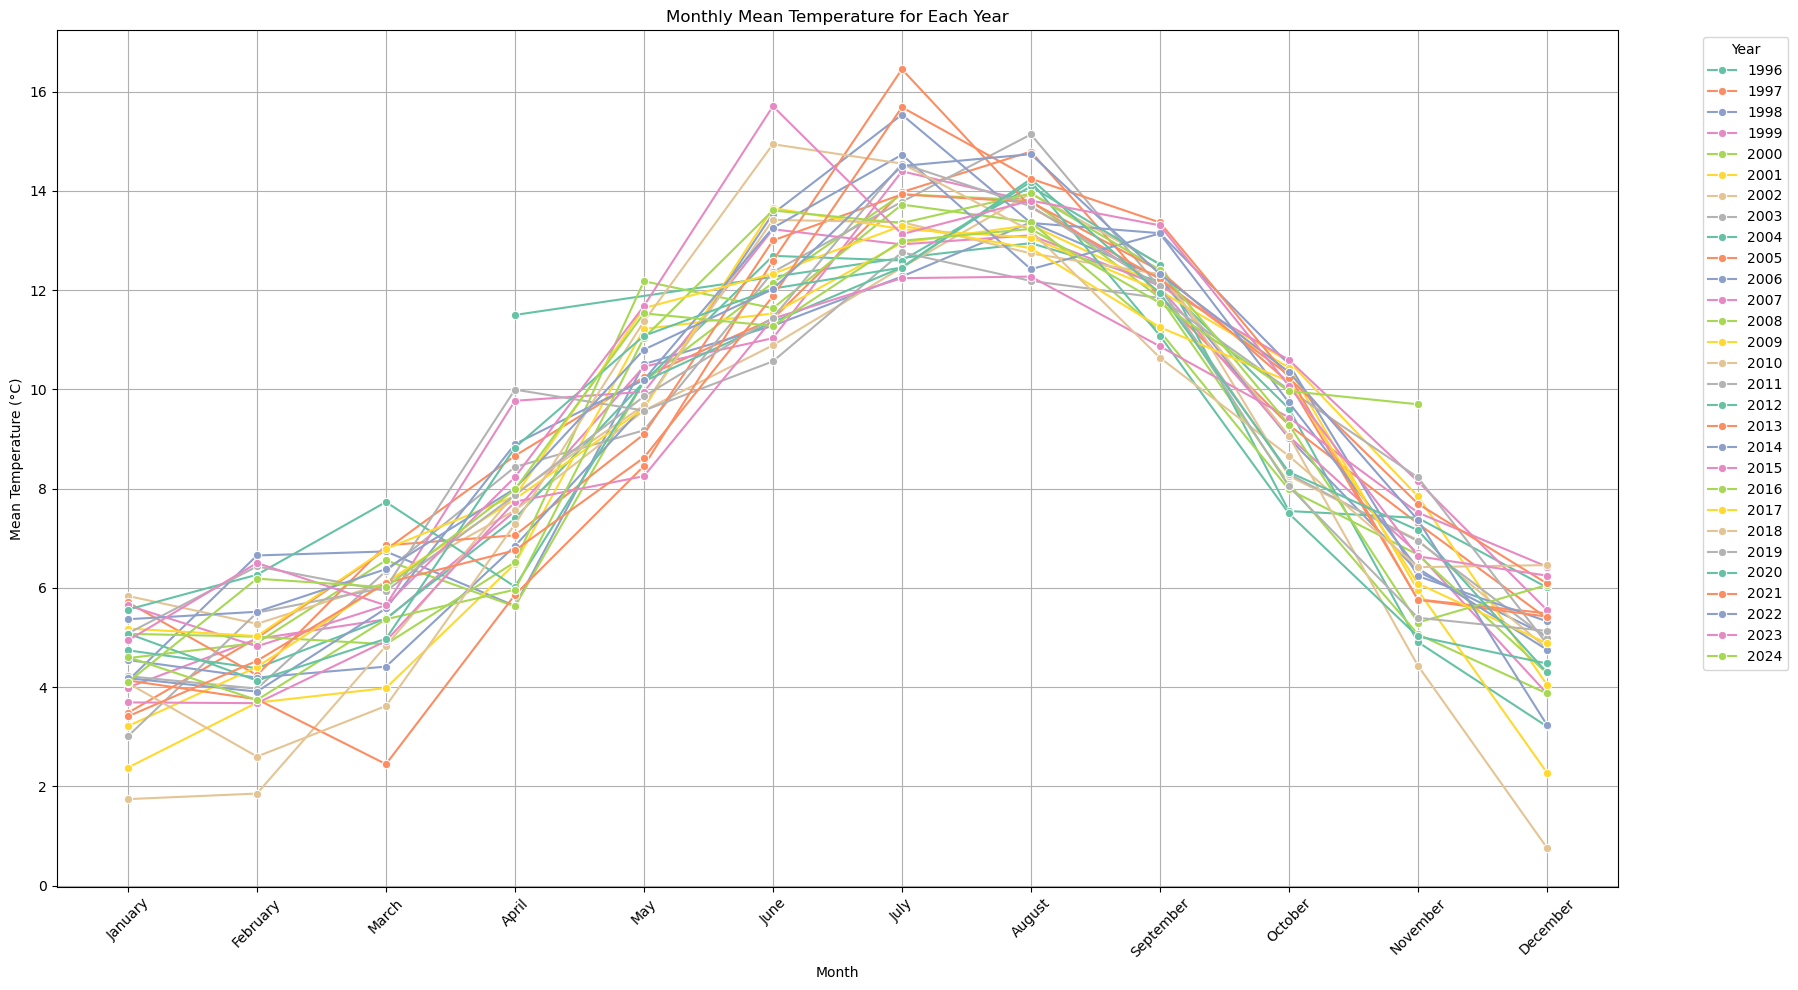

In [115]:
# Monthly Mean temperature: Extract year and month.
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month_name()

# Calculate monthly mean temperature.
monthly_mean = data.groupby(['year', 'month'])['temp'].mean().reset_index()

# Arrange months of week in appropriate order.
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_mean['month'] = pd.Categorical(monthly_mean['month'], categories=months_order, ordered=True)
monthly_mean = monthly_mean.sort_values('month')

# Plot.
plt.figure(figsize=(18, 10))
sns.lineplot(data=monthly_mean, x='month', y='temp', hue='year', palette='Set2', marker='o')

# Set labels and title.
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.title('Monthly Mean Temperature for Each Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Part 2: Windspeed
2.1 Convert 'ws' (windspeed) to numeric values, handle non-numeric values and drop rows where data is not available (NaN):

In [116]:
# Convert 'ws' (windspeed) to numeric values & handle non-numeric values.
data['wdsp'] = pd.to_numeric(data['wdsp'], errors='coerce')

# Step 4: Drop rows with NaN values in either 'date' or 'wdsp'.
data = data.dropna(subset=['date', 'wdsp'])

2.1 Set the date as the DataFrame index to allow for more efficient time based data analysis, e.g. plotting time series, calculating rolling averages or resampling data by different time periods such as monthly or yearly to meet the requirements of this excercise:

In [117]:
# Set the date as the DataFrame index.
data.set_index('date', inplace=True)

2.2 Plot the windspeed over time (July '96 to Oct '24):

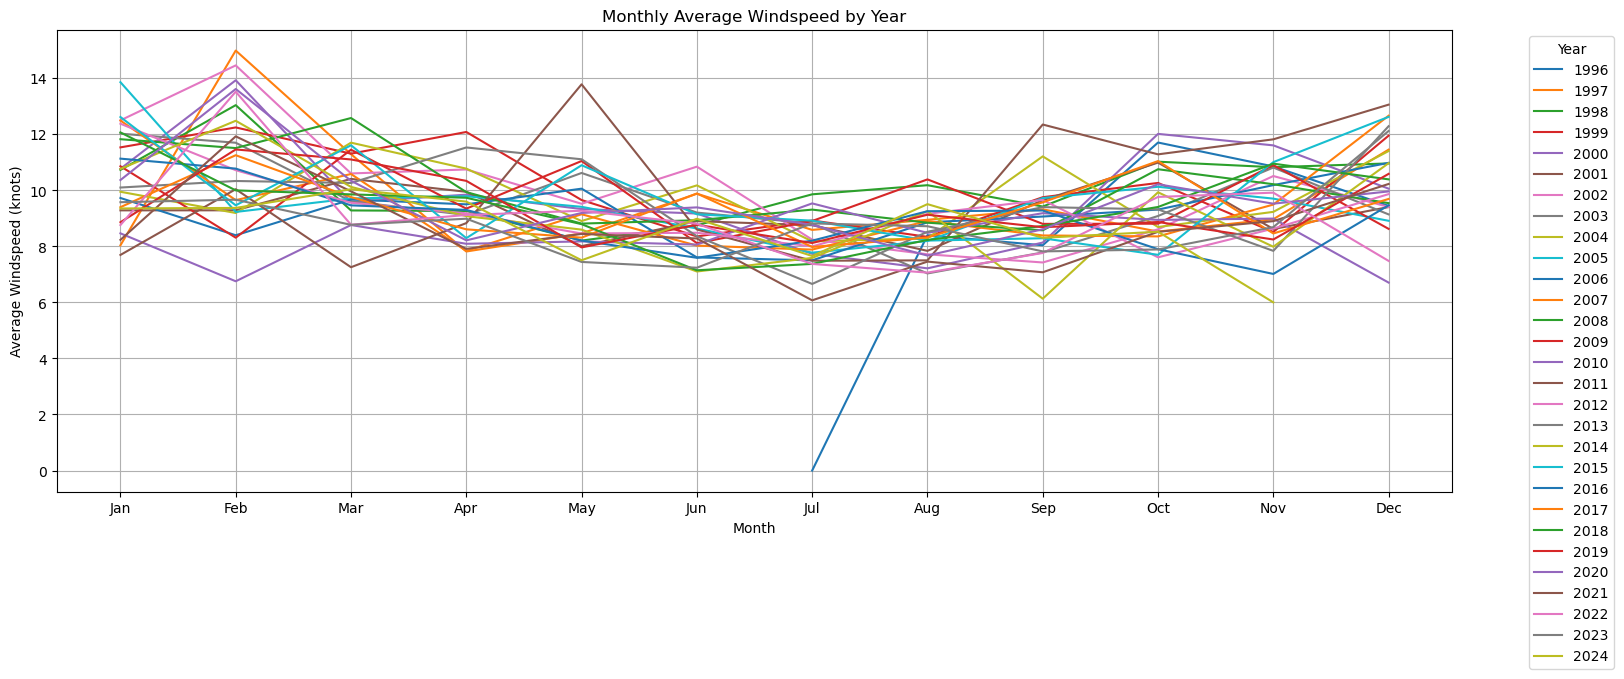

In [118]:
# Extract year and month.
data['year'] = data.index.year
data['month'] = data.index.month


# Calculate mean windspeed for each month of each year.
monthly_mean = data.groupby(['year', 'month'])['wdsp'].mean().unstack()

# Plotting each year's monthly mean windspeed as a separate line.
plt.figure(figsize=(18, 6))

# Transpose to have months on the x-axis.
monthly_mean.T.plot(ax=plt.gca())  
plt.xlabel('Month')
plt.ylabel('Average Windspeed (knots)')
plt.title('Monthly Average Windspeed by Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

2.3 Plot rolling windspeed across 24 hrs for **Jan 20th. 2024**:

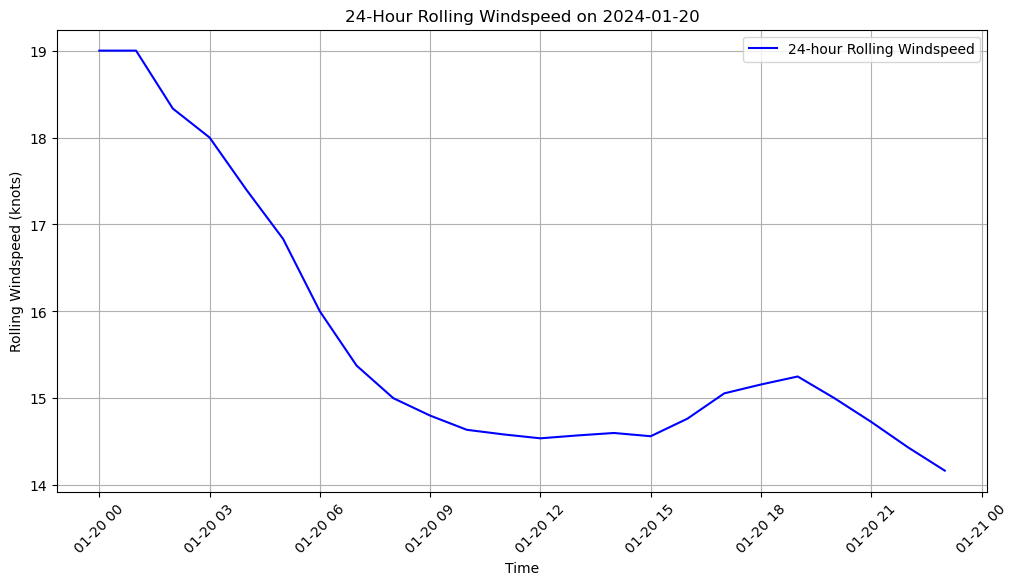

In [119]:
# Filter data for the specific day: Jan 20th. 2024.
specific_day = '2024-01-20'

# Got SettingWithCopyWarning initially so created a copy of the filtered data.
data_specific_day = data[data.index.date == pd.to_datetime(specific_day).date()].copy()

# Now use .loc to assign rolling windspeed, as we're working with a copy
data_specific_day.loc[:, 'rolling_windspeed'] = data_specific_day['wdsp'].rolling(window=24, min_periods=1).mean()

# Plot the rolling windspeed
plt.figure(figsize=(12, 6))
plt.plot(data_specific_day.index, data_specific_day['rolling_windspeed'], label='24-hour Rolling Windspeed', color='blue')
plt.xlabel('Time')
plt.ylabel('Rolling Windspeed (knots)')
plt.title(f'24-Hour Rolling Windspeed on {specific_day}')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()